# **Word Embeddings**


**Steps to submit your work:**

1.   Download the notebook from Moodle. You can open either using Jupyter or Google Colab.
  * if you are using Jupyter then make sure you keep both the lesson file and the util file in the same folder
  * if you are using Google Colab, then you first upload the lesson file to drive and open in Colab then use the file upload option within Colab to upload the util file (this is recommended)
2.   Complete the assignments
3.   Download as .ipynb
4.   Name the file as "lastname_firstname_WeekNumber.ipynb"
5.   After following the above steps, submit the final file in Moodle

In [ ]:
!hostname

# **Word Embeddings**

As we first saw in the tf•idf lesson, in order for a computer to work with
text, we needed to first convert the text/words into a numerical representation. The algorithm for tf•idf is based on word frequency counts. However, coming up with a meaningful 'number' that captures the semantic difference between
words is difficult.

## **Edit Distance**

As an example of using a numeric value to signal the difference between words
is spellcheckers. For example, they can use
'edit' distance between two words to determine how similar they are.The edit distance is how many modifications (letter updates, additions, subtractions) are needed to get from one word to the other.
This allows one to offer possible corrections for a misspelled word. For example, each of the following pairs have a 1 edit distance:

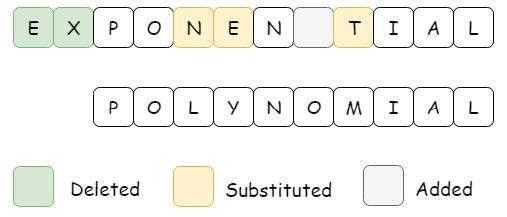

* capital, capitol (change 'a' to 'o')

* war, warm (add an 'm')

* brand, band (drop the 'r')

Of course, edit distance is incapable of capturing meaning between words (the
edit distance of 4 between
warm
and
mild
is meaningless
in trying to evaluate the distance in the semantics).

##**Word Embeddings, Word Vectors**

A majority of NLP (natural language processing) techniques attempt to make
sense of (understand and derive meaning) text. In order to do this, an
important processing step is to convert each word into a representation that
computers and algorithms can use.

The result of converting a word/token into a number or list of numbers is a
**word embedding**. Each word is represented by a vector of real numbers
(e.g. floats) -- the interpretation of those numbers depends on the model or
algorithm used. In most cases,those numbers are not intuitive or readily
accessible.

As an example the following vector may represent the word 'dog' with 4 attributes.

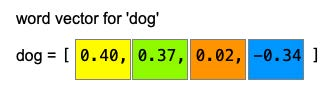

Word vectors are synonymous with word embeddings. You may also see the word 'row vector' to describe a word embedding. Additionally these vectors can be called a
k-dimensional
vector or a vector with k columns, components, attributes, features, traits,variables, or dimensions.

For most algorithms that produce word embeddings, the actual meaning or
interpretation of the columns (i.e. attributes) is unknown. This is
especially true of many machine learning(ML) algorithms that produce a model or representation that best 'fits' its data. The numbers/vectors, etc. that are generated cannot be interpreted in any meaningful way. It's one of the reasons why machine learning models in many situations are described as a black box.

For example, below are two word vectors for dog and car:




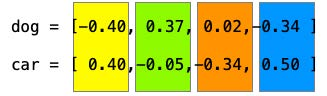

In this case the meaning of the columns (generated from an ML algorithm) could be related to the concepts of 'fast', 'pet', 'animal', 'transportation', but we really have no way of knowing.

## **Words as Vectors**

Representing words as vectors of numbers opens up the world of linear algebra
(working with vectors and matrices) to working with text. We won't necessarily
require you to know linear algebra (we'll try to introduce the concepts as needed), but if you want to know why the underlying math works, taking a course in linear algebra will add to your data science expertise.

The following are a few good (and free) references:

* http://joshua.smcvt.edu/linearalgebra/book.pdf

* https://www.deeplearningbook.org/contents/linear_algebra.html


## **Spacy Word Vectors**

The NLP package
[spacy](https://spacy.io/https://)
includes the ability to work with
word vectors. In order to use spacy, you will need to download and install
a language model -- a model trained using a certain corpus (like a news
feed, Wikipedia, etc). The following can take a few minutes to run. You will need to do so each time you start a session.

The code cell below installs the spacy models, for the most part all the examples
work with either the
en_core_web_md
(100MB of data) or
en_core_web_lg
(850MB).
If you are low on patience, you can set
use_large=False.

In [2]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 777.1 MB 13 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [7]:
# this cell will take a long time to run
# you only need to run it once per session
def load_model():

   import spacy
   if spacy.__version__ != "2.2.4":
       print("WARNING, spacy version may not have vectors")
   import en_core_web_lg
   return en_core_web_lg.load()


nlp = load_model()

print('Total Words', len(nlp.vocab))

WARNING, spacy version may not have vectors


ModuleNotFoundError: No module named 'en_core_web_lg'

In [6]:
import spacy
nlp = spacy.load('en_core_web_lg')

OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

In [7]:
https://jupyterhub.ischool.illinois.edu/jupyter/user/junting6/?token=b3a837b1517a4e46a3c223bb1e427ea0

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.



```
import spacy                    # not always needed
import en_core_web_md           # the medium size model is fast
import en_core_web_lg           # the large size model
model.load()                    # this takes a long time
```



Once the model is loaded, we can do some simple things with word vectors:

In [ ]:
def word_demo(md):
   # retrieve words from the English model vocabulary 
   cat = md.vocab['cat']  

   # print the dimension of word vectors
   print('vector length:', len(cat.vector)) 

   # print the word vector
   print('cat:', cat.vector)    

word_demo(nlp)

## **Vector Dimensions**

Did you notice what
cat.vector
printed? That's 300 dimensions that
contribute to the meaning of the word cat. Each word in the spacy model has
300 attributes. We really don't
know the meaning of each of these
attributes, but the machine learning algorithm trained the model to output
300 features for each word.

## **Distance Between Words (the reprise)**

Now that we have vectors for words, we can use linear algebra and vector space models to analyze the relationship between words.
In many data science and machine learning tasks, distance between two
items can be used to indicate similarity or to evaluate the 'cost' or 'fit' of
a model.

Although we will have a separate lesson on distance metrics, as we saw in the tf•idf lesson, one of the main metrics for working with vectors is cosine
similarity. This metric relies on normalizing the two input vectors so that
longer vectors (in magnitude) don't over influence the calculation (e.g. just because a document contains more words doesn't make it more important).

We can visualize cosine similarity (the value of 𝛳 in the image below) to show
the distance between two words (the value d, represents euclidean distance).

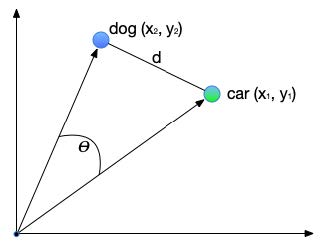

Using the cosine distance formula:

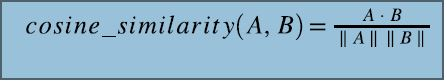

We can also calculate it using numpy (assuming both A and B are defined):



```
import numpy as np
cosine_A_B = np.dot(A, B)/(np.linalg.norm(A) * np.linalg.norm(B))
```



As we saw in the tf•idf lessons, the L2 norm (
np.linalg.norm
) is just the square
root of the sum of the squared components:



In [ ]:
def simple_l2(vector):

   ssq = 0
   for v in vector:
      ssq += v * v
   return np.sqrt(ssq)

def show_dog_norms(md):
   dog = md.vocab['dog']
   print(np.linalg.norm(dog.vector))
   print(dog.vector_norm)
   print(simple_l2(dog.vector))
   
show_dog_norms(nlp)

However, the spacy
similarity
method does this calculation:






In [ ]:
cat = nlp.vocab['cat']
dog = nlp.vocab['dog']
car = nlp.vocab['car']
print('The similarity between dog and dog:', dog.similarity(dog))
print('The similarity between dog and car:', dog.similarity(car))
print('The similarity between dog and cat:', dog.similarity(cat))

**Exercise**

Implement the function
spacy_sim
which uses numpy to calculate the
cosine similarity between the two spacy tokens. You can use either
np.linalg.norm
or
\<spacy_word>.vector_norm

In [ ]:

import numpy as np

def spacy_sim(a,b): 
  return -1

print(spacy_sim(nlp.vocab['dog'], nlp.vocab['car']))


## **The Meaning of Similar**

As noted before, the range of sim will be from -1 to +1. A value of 1 is a
perfect match (sameword), but a -1 does not mean 'opposite'. Word embeddings do not capture antonyms. The vectors captures the word-context from the trained corpus. So it highly depends on what corpus was used to build the word vectors. The cosine similarly of antonyms are generally high. The cosine similarity of (fast, slow) (high, low) should be quite high because they (most likely) occur in the same context.

So similarity is co-occurrence and dissimilarity means the words do not appear within the same context (usually).



```
cold = nlp.vocab['cold']
hot = nlp.vocab['hot']
print(spacy_sim(hot, cold))
```

What do you notice?



## **Word Math**

With word vectors you can do simple math with them to determine if the
'difference' between pairs of words have similar meaning.

In the next example, we show that the difference between
father
and
mother
is very close to the difference between
uncle
and
aunt

* d1 is a vector that represents the difference between father and mother

* d2 is a vector that represents the difference between uncle and aunt

* if d1 and d2 are close in vector space (e.g > 0.70), they are similar

In [ ]:
def homemade_sim(a,b):
   return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

def demo_vector_math(md):
   man = md.vocab['father'].vector
   woman = md.vocab['mother'].vector
   d1 = man - woman

   uncle = md.vocab['uncle'].vector
   aunt = md.vocab['aunt'].vector
   d2 = uncle - aunt
   print('d1 and d2 close:', homemade_sim(d1, d2) > 0.70)

   
demo_vector_math(nlp)

## **Finding Similar Words**

Using the same math, we can build upon that to find all the words that are
closest to a specific word.

In [ ]:
def all_words_except(md, word):
  # get all words in the vocabulary
  # each must have a word vector
  # don't include the exception
  return [w for w in md.vocab if w.has_vector and w.is_lower and w.lower_ != word.lower_]

def most_similar(md, name, topn=10):
   word = md.vocab[name]

   allwords = all_words_except(md, word)
   
   # sort words by similarity in descending order
   out = sorted(allwords, key=lambda w: word.similarity(w), reverse=True)

   # slicing to the rescue
   return out[:topn]

def demo_close_words(md, word):
   neighbors = most_similar(md, word)
   print([w.text for w in neighbors])

# this can take a long time to run
demo_close_words(nlp, 'car')

The above code can take a long time to run since we are looking at
all
the
words in thecorpus (see
all_words_except
).


Be sure you understand the process that is being shown. What's so interesting
(exciting!!) is that the algorithm used to create these vectors had only the text as its input. No dictionary, thesaurus, or experts were used. In the next lesson, we will use some of these algorithms.

## **Model Matters**

The words you get back will depend on which spacy model you are using. If you aren't getting the results you expect, it could be that the model you are using isn't trained on the same data you have or it's not suited for your task.

## **Word Play**

Perhaps 'coolest' feature of using linear algebra on word vectors is we can
use this math to find word analogies.

For example, let's fill in the blank:

**Math + Symbols** is ❓❓❓❓

We can use the similarity functionality we just build to find the word.

In [ ]:
cos = lambda v1, v2: np.dot(v1, v2)/(np.linalg.norm(v1) * np.linalg.norm(v2))

def all_words_except(md, exclude_set):
   # the valid function ensures we don't include any of the words
   # that are part of the equation (input)
   def valid(w, exclude):
      if w.has_vector and w.is_lower:
        for t in exclude:
           if w.lower_.find(t) >= 0:
              return False
        return True
      return False
   return [w for w in md.vocab if valid(w, exclude_set)]


def find_closest(md, vector, exclude, topn=50):
   working_set = all_words_except(md, exclude)
   candidates = sorted(working_set, key=lambda w: cos(vector, w.vector), reverse=True)
   return candidates[:topn]


def demo_word_math(md):
   vector = md.vocab['math'].vector + md.vocab['symbol'].vector
   answer = find_closest(md, vector, ['math', 'symbol'])
   print(answer[0].text)

Be sure to take the time to understand what is happening when you call
demo_word_math(): 

The big issue is that it takes a long time to run these since
all_words_except
is looking at all the words in the vocabulary.
Also, it's important to remove the words math, symbol from the vocabulary, since those words will match perfectly.

The function
valid
also removes words that begin with 'math' (e.g
mathematics, etc). It's not a perfect solution, but it's enough for the demonstration.



```
demo_word_math(nlp)
```



What did you get ?

Does it make sense for **Math + Symbols** is ❓❓❓❓

Depending on the data used to build the model (tweeter, news, Wikipedia, etc) you may have to adjust your results. For example, using the
en_core_web_md
model gives different results.

## **♪♫ The Most Famous Word Analogy of All ♬♬**

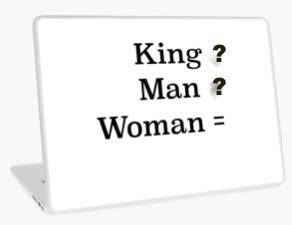

One of the popular examples of math with word vectors isto solve this equation:

**Man** is to **Woman** as **King** is to ❓❓❓❓

Before reading on, grab some paper and see if you can come up with the math
(just addition and subtraction) to solve it (it's fun!).


This can be solved using the vector math:

## **Don't Go Past**

Make sure you understand the logic behind that vector math. It's like saying
take the difference between ('woman' - 'man') and add that to 'king'.
Let's use our vector math and code this analogy up:



```
def king_is_to_what(md):

   vector = md.vocab['king'].vector - md.vocab['man'].vector + md.vocab['woman'].vector
   answer = find_closest(md, vector, ['king', 'man', 'woman'])
   print(answer[0].text)
   
king_is_to_what(nlp)
```

Be sure to code this up and run it



## **I'll have some 🍟❓with that.**

Most of the world knows about french fries, but other countries may have
another word (or similar food) to them. Let's use this machinery to help us out in case we go to Canada on vacation.

Do Canadians even eat fries ?

To find the equivalent of US fries in Canada, set up the following equation:



```
def where_are_my_fries(md):
   vector = md.vocab['canada'].vector - md.vocab['usa'].vector + md.vocab['fries'].vector
   ex = ['canad', 'us', 'frie']
   answer = find_closest(md, vector, ex)
   print([a.text for a in answer[0:10]])
   
where_are_my_fries(nlp)
```



## **🍔 Really ?**

Luckily, we know burgers seems a bit strange. Much like tweaking with stopwords, we can decide to remove some words that might have been affected by the training.

In most situations, this isn't a scalable solution, but we're hungry and we want Canadian fries.
In order to narrow down the results, you need to remove synonyms for fries
(potatoes) and remove any reference to hamburgers (probably due to the training data):


```
ex = ['canad', 'us', 'frie', 'bacon', 'potato', 'burger', 'steak']
```



Add those to the exceptions list above and re-run your code.


If you inspect the top 10, you will find poutine, cheese, and gravy (the
Canadian delicacy)! Although the need to tweak the results, shows the
importance of data used to build the word vectors.

## **Visualizing Word Vectors**

Since each word vector contains hundreds of dimensions (300 for spacy), it's
impossible to visualize withoutprojecting the high dimensions into lower
dimensional space (i.e. 2 or 3).

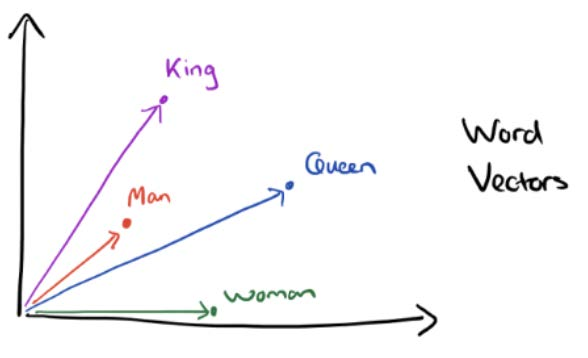

Although we will have a separate lesson on how to transform a data-set with many
dimensions to one with only a few of its 'most important' dimensions, we will use something called t-Distributed Stochastic Neighbor Embedding (t-SNE for
short). The t-SNE algorithm is particularly well suited for the visualization of high-dimensional datasets.

Don't worry too much about the actual code (it's not important for this lesson).
You
should
be able to read it. The main point is to see where the 'words' are in 2D space and their relative distances to each other.

In [ ]:
def reduce_dimensions(md, labels):
   from sklearn.manifold import TSNE
   import numpy as np

   data = np.array([md.vocab[w].vector for w in labels])
   # reduce to two
   tsne_model = TSNE(n_components=2)
   data_2d = tsne_model.fit_transform(data)

   return data_2d

def plot_results(data_2d, labels):
   import matplotlib
   import matplotlib.pyplot as plt

   # plot the 2d vectors and show their labels
   fig, axes = plt.subplots()
   axes.scatter(data_2d[:, 0], data_2d[:, 1], s=100)
   for i, txt in enumerate(labels):
       axes.annotate(txt, (data_2d[i,0], data_2d[i,1]), xytext=(2, 3), textcoords='offset points')
   axes.grid()
   return fig

def show_vector_space(md):
   labels = ['king', 'man', 'queen', 'woman']
   data = reduce_dimensions(md, labels)
   fig = plot_results(data, labels)

show_vector_space(nlp)

If the following line is a bit confusing:
data_2d[:, 0], data_2d[:, 1]
, now's a good time to review array slicing from INFO 490. We will be using
that syntax many times.

You can see that there is indeed similar 'distances' between the points.

Another fun
visualization tool
for word vectors is with using TensorFlow. TensorFlow is a Google product to create, use (and learn about) machine learning algorithms easily. You can even use TensorFlow to create word embeddings --assuming you have access to a large corpus to train on. Our next lesson is on word2vec, one of
the most popular implementations for building and using word vectors.

## **One Hot Encoding**

Algorithms that produce word vector models -- like word2vec and GloVe (more
next lesson) usually input their 'words' as vectors as well. However, they
use something called one-hot encoding.

One hot encoding simply assigns either a 1 or a 0 to an attribute if that
attribute is present. For example, in the following sentence: 'a word is known by the company it keeps' wouldhave the following matrix
representation:

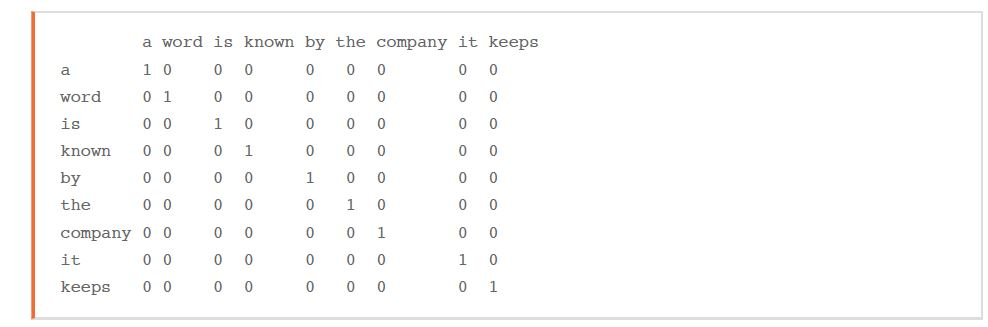

The rows are are the unique set of words in the corpus. The columns are the corpus. The big issue of course is that for a large corpus, the matrix is
*sparse*
meaning most of the values are zero. Hence, it usually needs a more efficient
way to model this representation in memory.

Note that one hot encoding only captures location information. While word vectors capture 'meaning' and location. They enable deep learning models as
well since they can be used as input into these algorithms.

**Bonus Vectors**

As with a lot of machine learning models, many will be too big to load into
notebooks. However, if you want to experiment with other word vectors (on your own computer -- they are too big to load into a notebook), the following models have been trained using Wikipedia.

* https://fasttext.cc/docs/en/english-vectors.html

## **Lesson Assignment**

This lesson uses a significant amount of compute resources. 

Once the model
is loaded, each function shouldn't take too long to run in the notebook.
Using what you learned in this lesson, you are going to create a function named
find_analogy. <br>
<br>

This function takes 2 arguments:

*   the nlp object to use to get the spacy word vectors
*   an array of 3 strings (used as words)<br>

<br>

The function returns a string:


*  name/text of the closest word that completes the analogy<br>
<br>


Example use

```
print(find_analogy(nlp, ['france', 'paris', 'rome']))
```

This should print
Italy
or
italy
(case will not matter for an accepted answer). One thing to remember is the order of the words given to
find_analogy
will matter. The
same math formula is used so these analogies are 'hard' coded with how the
vector math will work.




**implementation details**

A few notes:


*   you can model much of your code after the examples. However, many of
the examples have assumptions that may not be true
*   write at least one helper function, find_best_fit , for find_analogy to use

*   this will make your code more readable, manageable, and testable
*   use the same
logic
to exclude words as
all_words_except


In [ ]:
def find_best_fit(md, result, words, topn=15):
   # md is the nlp model
   # result is a vector you're trying to get close to
   # words is a list of spacy objects/words (3 of them) that
   # need to be excluded (e.g nlp.vocab['man'])

   # return the topn candidates, in order so index 0 is the best fit
   # it should always have at least one word in it
   return []
  

def find_analogy(md, three_words):
   # md is the nlp model
   # three_words is a list of strings (e.g. ['king', 'man', 'woman'])

   # return the text (a string) for the word that meets the analogy
   # it should use
   return None


**Test Cases**

A few test cases to try:



```
print(find_analogy(nlp, ['king', 'man', 'woman']))
#--> queen
print(find_analogy(nlp, ['Illinois', 'Springfield', 'Lansing']))
# --> michigan
print(find_analogy(nlp, ['walked', 'walk', 'go']))
# --> want past tense of go (went)
```



Note that order will matter:



```
print(find_analogy(nlp, ['pizza', 'Italy', 'Mexico'])) # YES tacos
print(find_analogy(nlp, ['Italy', 'pizza', 'Mexico'])) # NO SPAIN
```



If you start playing with these word vectors, remember, not all word
analogies will work:



```
# fastest, (furthest in top 10)
print(find_analogy(nlp, ['quickest', 'quick', 'far']))

# raptor??, (bird not even in top 10)
print(find_analogy(nlp, ['mammal', 'dog', 'eagle']))
```



**Optimization is the root of evil, but ...**

Although you always want correctness over efficiency, once things are
working there are afew places you can look to make your code faster:

* rather than sorting the entire array of words and the distances/similarities,
you canonly sort the words worth keeping (a much smaller list)

**Steps to submit your work:**


1.   Download the notebook from Moodle. You can open either using Jupyter or Google Colab.
  * if you are using Jupyter then make sure you keep both the lesson file and the util file in the same folder
  * if you are using Google Colab, then you first upload the lesson file to drive and open in colab then use the file upload option within Colab to upload the util file (recommended)
2.   Complete the assignments
3.   Download as .ipynb
4.   Name the file as "lastname_firstname_WeekNumber.ipynb"
5.   After following the above steps, submit the final file in Moodle





<h1><center>The End!</center></h1>